# The Intuitive Connection Between Binomial and Beta Distributions

Because we know coins tend to be fair, we will assume the following probability of success: 0.4954128440366973


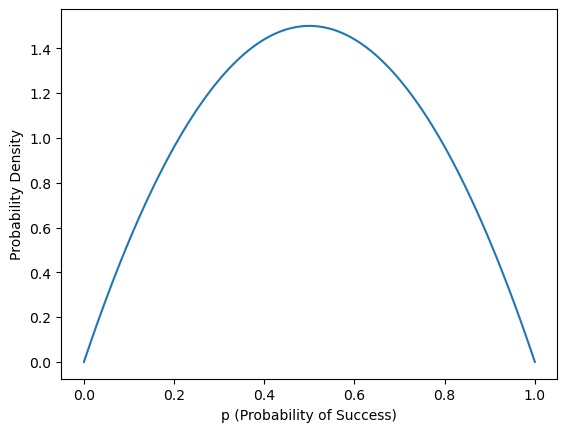

In [1]:
#Imagine that we have a coin (very original, I know) and we want to determine whether it is fair or not. 
    #Ie. Each trial is a bernoulli distribution with some unknown probability of success (flipping heads) and probability of failure (flipping tails). If it is fair then the probability of success should be 50%.
#Given we haven't observed any coin flips, we have to assume some prior success rate. 
#We know that generally coins tend to be fair, so a very rational assumption is that if we flipped the coin 4 times (n=4), we would observe 2 heads/successes (k=2 or alpha=2) and 2 tails/failures (beta = 2).

#Using those pseudo alpha (success) and beta (failure) values, we determine a beta prior.
#The prior is a beta probability density function (PDF)
    #The Beta PDF represents our belief about the value of some unknown parameter, in this case the probability of success.
    #This particular Beta PDF, the prior, quantifies our initial belief about which probability between 0 and 1 is the true success rate before we observe any data.
    #It's y-axis shows probability density, which - unlike a probability mass function (explained later) - it not itself a probability.
        #Rather, it is a value that, when integrated over an integral, yields a probability.
        #Think of it as representing the concentration of probability of different values of p, but remember that at any given point it has no direct probabalistic interpretation.


import math
import numpy as np
import matplotlib.pyplot as plt


def beta_norm(alpha: int, beta: int) -> float:
    '''
    Computes the beta normalization constant (the Beta function) for the Beta Distribution. This constant ensures the density integrates to 1.

    NOTE: In Bayesian updating, a similar integration over the parameter space yields the marginal likelihood of the observed data, which will be explored later.
    
    PARAMS:
        - alpha: Number of successes in n trials
        - beta: Number of failures in n trials

    RETURNS:
        - The beta normalization constant described above
    '''
    return (math.factorial(alpha-1) * math.factorial(beta-1)) / math.factorial(alpha + beta - 1)


def beta_pdf(alpha: int, beta: int, p_hat_cont: np.ndarray[float]) -> np.ndarray[float]:
    '''
    Computes the beta distribution using its probability density function.

    PARAMS:
        - alpha: Number of successes in n trials
        - beta: Number of failures in n trials
        - p_hat_cont: An array of evenly spaced probability values [0,1]

    RETURNS:
        - The probability density values in a beta distribution
    '''
    beta_normalization_constant = beta_norm(alpha, beta)
    beta_dist = (p_hat_cont**(alpha-1) * (1-p_hat_cont)**(beta-1)) / beta_normalization_constant
    return beta_dist


#Set pseudo values and a continuous probability range [0,1], p_hat_cont
pseudo_alpha = 2
pseudo_beta = 2
p_hat_cont = np.linspace(0,1,110)


#Compute beta prior
beta_dist_prior = beta_pdf(pseudo_alpha, pseudo_beta, p_hat_cont)

#Select the mode of the beta prior - the value of p that maximizes the Probability Density Function (PDF)
prior = p_hat_cont[beta_dist_prior.argmax()]
print(f"Because we know coins tend to be fair, we will assume the following probability of success: {prior}")

#Plot the probabilities against the probability density
plt.plot(p_hat_cont, beta_dist_prior)
plt.xlabel("p (Probability of Success)")
plt.ylabel("Probability Density")
plt.show()

In [2]:
def n_choose_k(n: int, k: int) -> int:
    '''
    Implementation of n choose k - interpret result as "there are ~result~ ways to choose k from n"
    
    NOTE: used in the Binomial PMF

    PARAMS:
        - n: Total trials
        - k: Number of successes in n trials

    RETURNS:
        - The number of ways to choose k elements from a set of n elements, also known as the binomial coefficient (n choose k)
    '''
    # return math.comb(n,k) #A more efficient implementation of the line below, which is expanded for pedagogical purposes
    return math.factorial(n) //(math.factorial(k) * math.factorial(n - k))


def binomial_pmf(n: int, k: int, p: float|np.ndarray[float]) -> float:
    '''
        Produces a binomial PMF
        
        NOTE: If an array is passed in as p, then will produce a binomial probability distribution as multiplication and power operations will execute element-wise

    PARAMS:
        - n: Total trials
        - k: Number of successes in n trials
        - p: Unknown probability of success (we are inferring this)

    RETURNS:
        - The probability of getting k successes in n independend Bernoulli trials given an assumed probability of success
    '''
    
    return n_choose_k(n, k) * ((p**k) * (1-p)**(n-k))

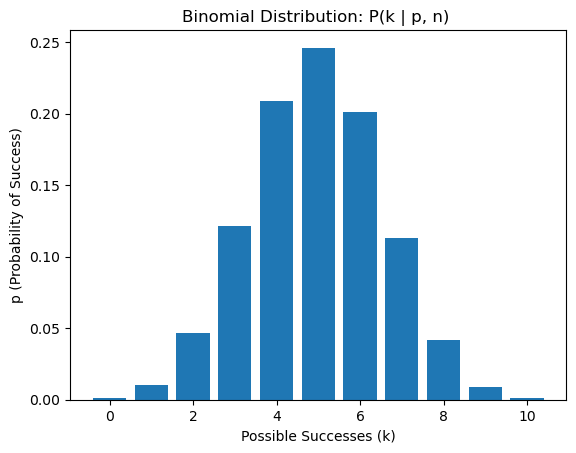

In [3]:
#Traditional Binomial Probability Mass Function (PMF): P(k | n, p)
    #This function provides the probability of observing exactly k successes in n independent trials, assuming the probability of success, p, is known

#Here, we are using our prior probability of success computed from a beta distribution of pseudo observations
#This will tell the probability of observing each possible discrete value, based on the pre-existing probability of success.

#NOTE: I've used the Beta PDF and Binomial PMF. What's the difference between a PMF and PDF?
    #PMF (probability mass function) is used to quantify probabilities (y-axis) among discrete variables (x-axis)
    #PDF (probability density function) is used to quantify our belief about continuous parameters like probabilities (x-axis) using probability density (y-axis)


n=10 #trials
k_vals = np.arange(0, n+1)

binomial_pmf_vals = [binomial_pmf(n, k_val, prior) for k_val in k_vals]

plt.bar(k_vals, binomial_pmf_vals)
plt.ylabel("p (Probability of Success)")
plt.xlabel("Possible Successes (k)")
plt.title('Binomial Distribution: P(k | p, n) ')
plt.show()

The probability with the highest likelihood is 0.30275229357798167


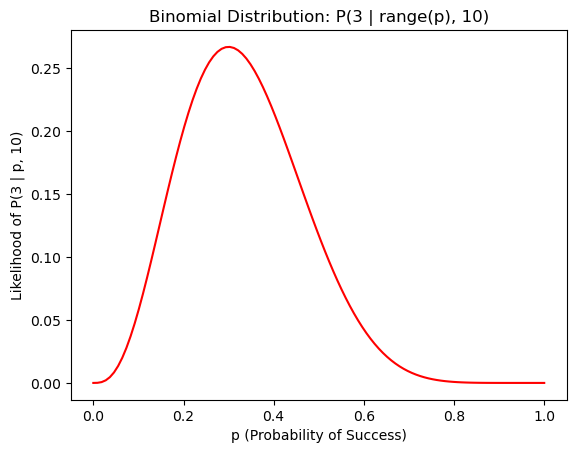

In [4]:
#Using the Binomial PMF, P(k|n,p), to quantify the probability of observing k successes of n trials when the probability, p, is known
#In the real world, we don't actually know the underlying probability of success, p
    #The best we can do is to iteratively update our belief about what that probability is based on observed data - this is where Bayesian inference comes in
    #In Bayesian inference, we can use the Binomial PMF to help us update our belief about p by repurposing it as a likelihood function where L(p) = P(data|p) and the data k and the data (k and n) are fixed.
    
#Let's assume we run a test and observe only 3 successes (k) in 10 trials (n) - a somewhat improbable outcome given an underlying success rate of 50% (see PMF in last cell) - should we still assume the coin is fair and should maintain a ~50% probability of success?
    #Probably not, so we should update our initial belief (our prior) about the success rate using the data we've observed
    #Since the true probability of success is unknown, we use the binomial likelihood - evaluated as a function of p - to express how plausible different values of p are given that we observed 3 successes (k) in 10 trials (n)
        #Woah woah woah - binomial likelihood? Evaluated as a function of p? Wut?
            #This only means we're going to use the Binomial PMF, holding n and k at 10 and 3, respectively, and plug in every p value between 0 and 1 to create a distribution that allows us to observe which probability is most likely
                #I use the word "likely" very specifically here because probabilities and likelihoods are different. 
                    #Probability -> Quantifies the chance of an event discrete or derived from a continuous distribution (by integrating over an interval - think probability density) and is normalized such that its value is constrained between 0 and 1 and its distribution integrates to 1
                    #Likelihood -> Describes the relative plausability of each parameter values in a range, in this case probability, given observed data. Importantly, likelihood does not have a fixed scale and is not constrained to sum or integrate to 1, so it is not a probability distribution. It is used to compare how well different parameter values explain data.
                    #Probability Density -> Specifically describes the relative concentration of probabliity along some continuous parameter, in this case probability. You can derive the probability of a particular parameter lying within an interval [a,b] by integrating the probability density function from a to b. When integrated over the entire range, probability densities always integrate to 1.
                
                    
#Below we effectively evaluate the Binomial PMF as a function of p given k and n in order to determine each probability's likelihood over a range of continuous probabilities between 0 and 1
k = 3
observed_alpha = k
observed_beta = n-k

successes_cont = np.linspace(0,10,110)
p_hat_cont = np.linspace(0,1,110)
binomial_probability_cont = binomial_pmf(n, k, p_hat_cont)

print(f"The probability with the highest likelihood is {p_hat_cont[binomial_probability_cont.argmax()]}")

plt.plot(p_hat_cont, binomial_probability_cont, color='red')
plt.ylabel(f"Likelihood of P({k} | p, {n})")
plt.xlabel("p (Probability of Success)")
plt.title('Binomial Distribution: P(3 | range(p), 10)')
plt.show()

The most likely probability of success is (mode of the distribution) 0.3302752293577982.


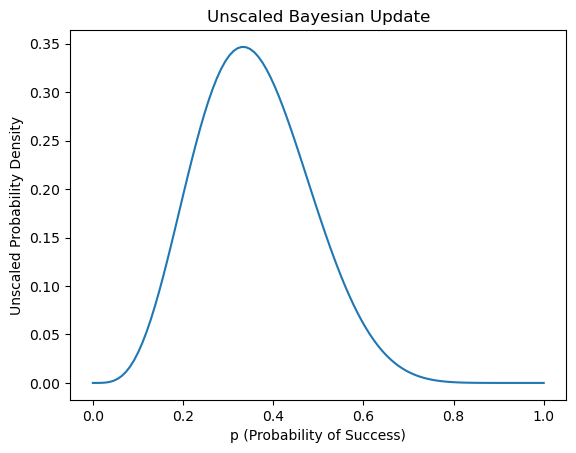

In [5]:
#Unsurprisingly, what we observe in the cell above is that the probability with the highest likelihood, given an observed 3 successes (k) of 10 trials (n) is about 30%
    #Here's the thing, we know the sample size is small and we know the coin is still pretty likely to be fair (have a 50% probability of success) - so we shouldn't really assume that the success rate of heads when flipping the coin should be 30%
        #Logically, based on what we know about coins in general and this particular coin, the most likely success rate should probably be somewhere between 30% and 50%

#So rather than take the 30% and run with it, instead we should UPDATE our prior belief to reflect the observed reality
    #In other words, we should to combine the assumed 50% and observed 30% successes of probability in a statistically rigorous way in order to most accurately reflect reality
        #How do we do this?

#We can use Bayes Theorem of conditional probability as a mechanism to update our beliefs about the unknown probability of success, p
    #The distribution representing our UPDATED beliefs is called a posterior distribution - you update a prior with observed data to get a posterior

#Bayes Theorem: P(A|B) = (P(A) * P(B|A)) / P(B)
#We can reinterpret this theorem for our problem as: 
    #P(p|data) = (P(p) * P(data|p)) / P(data)

    #P(p|data) -> What is our updated belief about the unknown probability of sueccess, p, after observing data?
        #This is the posterior probability density and it quantifies the concentration of probability for different values of p after taking observed data into account.
        #Derived by combining our prior believe about p with the likelihood of the data give a range of probabilies, p, and then normalizing by the marginal likelihood
    #P(p) = beta_dist_prior -> Our initial belief about p
    #P(data|p) = binomial_probability_cont -> The likelihood of observing the data given a range of p between 0 and 1
    #P(data) = ? -> The marginal likelihood that ensures the posterior integrates to 1 (we'll come back to this, don't worry)

#(P(A) * P(B|A))
#We start by multiplying our initial belief (prior) and the probability of success' likelihood distibution after observing k successes in n trials
    #This product is proportional to the posterior density computed with a beta distribution, but is unnormalized, so it doesn't integrate to 1
    #Dividing by the marginal likelihood P(data) normalizes the product, resulting in a proper posterior probability density for p that integrates to 1
    #Notably, the mode of the unnormalized posterior is the same as the normalized posterior, which we can observe in this notebook.

#This actually touches on a concept called a conjugate
    #In Bayesian statistics, a prior distribution is called conjugate to a likelihood function if the posterior distribution belongs to the same family as the prior
    #Because the result of updating the prior beta distribution using the binomial likelihood is also a beta distribution, the Beta distribution is conjugate to the Binomial likelihood
        #This greatly simplifies Bayesian updating because it means we can ALSO update beliefs by just updating the alpha and beta values used as parameters in the Beta PDF to evaluate the updated distribution
        #If you are confused about this, keep going a few more cells and the idea should become more clear.

unnormalized_posterior = beta_dist_prior*binomial_probability_cont

print(f"The most likely probability of success is (mode of the distribution) {p_hat_cont[unnormalized_posterior.argmax()]}.")

plt.plot(p_hat_cont, unnormalized_posterior)
plt.xlabel("p (Probability of Success)")
plt.ylabel("Unscaled Probability Density")
plt.title('Unscaled Bayesian Update')
plt.show()

In [18]:
#Let's come back to P(B) - the marginal likelihood - what is it anyways?
    #The marginal likelihood is the total probability of observing the data across all possible values of p weighted by the prior distribution
        #In other words, it's the integral of the unnormalized posterior distribution that we just computed! Dividing the distribution by it will scale the integral of the distribution to 1 
    #Practically speaking, it is a constant that normalizes our unscaled probability density to a valid PDF

#We can compute P(B) by integrating the unnormalized posterior distribution from 0 to 1
marginal_likelihood_np = np.trapz(unnormalized_posterior, p_hat_cont)
print("The Marginal Likelihood (integral of unnormalized posterior):", np.round(marginal_likelihood_np,8))

The Marginal Likelihood (integral of unnormalized posterior): 0.11188811


The most likely probability of success (mode of the distribution) is 0.3302752293577982.      
Notice how the most likely success rate lives between 0.3 and 0.5 here.       
Notice also how similar this distribution is to the one we just calculated with Bayes' Therom above AND how the most likely probabilities of success are THE SAME.


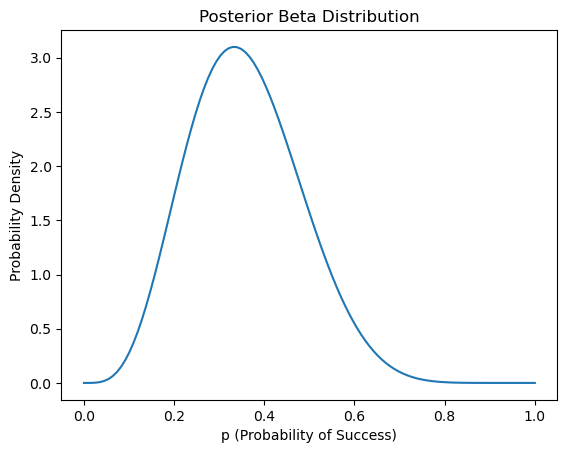

In [19]:
#Let's look at another way to compute our updated beta distribution
    #It's actually as simple as just computing a new beta distribution given all the observations we've seen/believed
        #NOTE: Remember this is allowed because the beta prior is conjugate to the binomial PMF

#We just add our believed successes and failures to the ones we actually observed to update the values
alpha_updated = pseudo_alpha + observed_alpha 
beta_updated = pseudo_beta + observed_beta

#Then very simply build a new beta distribution to see where we should now believe the most likely probability of success lies
beta_normalization_constant = beta_norm(alpha_updated, beta_updated)
beta_dist_posterior = (p_hat_cont**(alpha_updated-1) * (1-p_hat_cont)**(beta_updated-1)) / beta_normalization_constant

print(f"The most likely probability of success (mode of the distribution) is {p_hat_cont[beta_dist_posterior.argmax()]}.\
      \nNotice how the most likely success rate lives between 0.3 and 0.5 here. \
      \nNotice also how similar this distribution is to the one we just calculated with Bayes' Therom above AND how the most likely probabilities of success are THE SAME.")

plt.plot(p_hat_cont, beta_dist_posterior)
plt.xlabel("p (Probability of Success)")
plt.ylabel("Probability Density")
plt.title("Posterior Beta Distribution")
plt.show()

[0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811
 0.11188811 0.11188811 0.11188811 0.11188811 0.11188811 0.1118

/var/folders/nz/ht8s09bd1knct30kv0qm6c040000gn/T/ipykernel_40253/1354543285.py:4: RuntimeWarning: divide by zero encountered in divide
  derived_marginal_likelihood = ((1/beta_dist_posterior)*(beta_dist_prior*binomial_probability_cont))
/var/folders/nz/ht8s09bd1knct30kv0qm6c040000gn/T/ipykernel_40253/1354543285.py:4: RuntimeWarning: invalid value encountered in multiply
  derived_marginal_likelihood = ((1/beta_dist_posterior)*(beta_dist_prior*binomial_probability_cont))


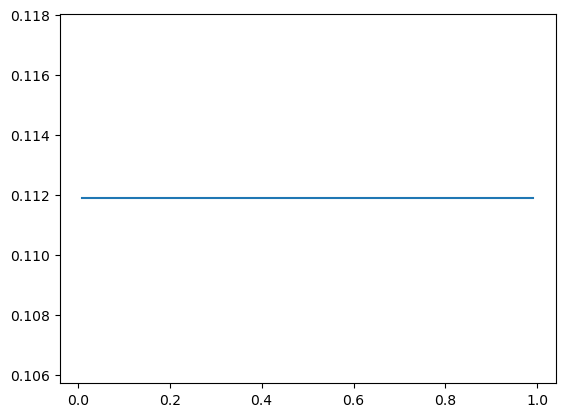

In [20]:
#Since the posterior is proportional to the unnormalized posterior (beta prior * binomial likelihood)...
#Multiplying the inverse of the posterior by the unnormalized_posterior should give the EXACT SAME value as integrating the product, or computing P(B), which you can see it does

derived_marginal_likelihood = ((1/beta_dist_posterior)*(beta_dist_prior*binomial_probability_cont))
print(derived_marginal_likelihood[1:-1]) #Removing the marginal likelihood of 0 and 1, which is computed as inf
plt.plot(p_hat_cont, derived_marginal_likelihood)

#Obtaining the same P(B) through integrating the unnormalized prior and algebraically extracting it from the posterior Beta distribution confirms that the Beta prior and Binomial likelihood behave as conjugate partners.
#Of course, a formal proof of conjugacy would requare demonstating this is value for all parameter values, but this illustration should help build some intuition about the connection between the two!

# Credible intervals, CDFs, PPFs, and Making Predictions

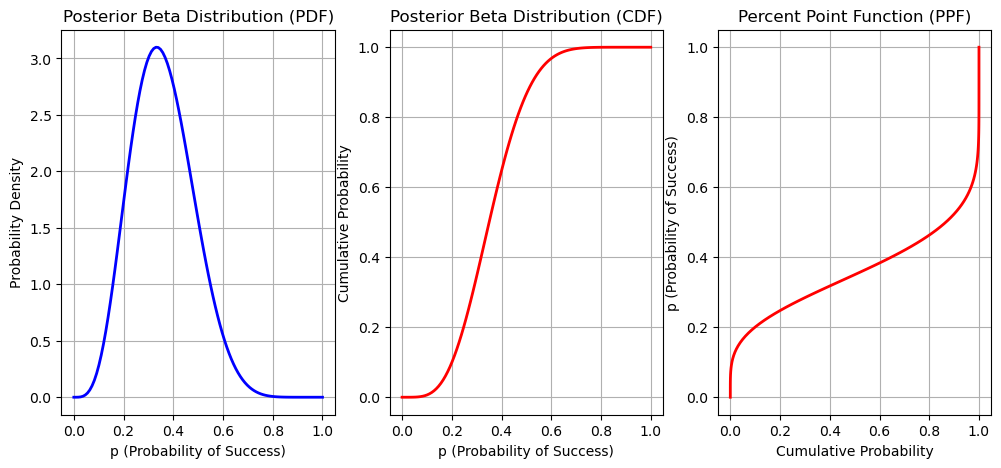

In [21]:
#Alrighty, now (hopefully) we understand the connection between the Binomial and Beta distributions. 
#The Beta distribution is conjugate to Binomial Likelihood and provides a probability density along a range of possible probabilities that could be the true success rate of some event.
#So what are we supposed to do with this information?
    #At a high level, we can do a lot of things - this is a powerful tool for making business decisions, providing a probabalistic range within which an unknown parameter (conversion rate, churn rate, etc) is believed to lie.
        #A/B Testing (this will be our focus)
        #Fraud Detection
        #Supply Chain Optimization
        #Etc

#Well, first of all we can now quantify the probability of the true success rate of an event landing between two probabilities.
#To do this, we'll need to review Cumulative Distribution Functions (CDF)
    #A CDF is a function that represents the cumulative probability (area under the curve) of a PDF from one end of the domain up to a given point. It is formally computed as an integral of the PDF.
        #It can be used to easily determine the probability that a given parameter lies between two values (the lower and upper bounds of a probability interval). It's important to note that, just like a PDF, you should never try to interpret a single point - only ranges between points.
        #More importantly, in Bayesian analysis, we can use the CDF to find the range of values that contain the parameter with a particular probability
            #This is called the Credible Interval, which is effectively the Bayesian counterpart to the Frequentist's Confidence Interval, a relationship we'll explore further.

#By inverting the CDF, we construct what's called a Percent Point Function (PPF), which allows us to find the corresponding parameter boundaries to any two upper and lower probability bounds.
    #While the CDF is a function of a parameter that yields cumulative probabilities, the PPF is a function of cumulative probabilities that yield parameters.
        #The PPF is ultimately how we find the parameter values associated with lower and upper probability boundaries.
        #Put more simply, the PPF allows us to measure how certain we are that the true probability of success lies within some range of probabilities

from scipy.stats import beta

#Create array of probability values from 0 to 1
p_values = np.linspace(0, 1, 1000)

#Compute CDF of Beta distribution over probability values
cdf_values = beta.cdf(p_hat_cont, alpha_updated, beta_updated)

#Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

#Plot PDF on left subplot
axes[0].plot(p_hat_cont, beta_dist_posterior, color='blue', lw=2)
axes[0].set_xlabel("p (Probability of Success)")
axes[0].set_ylabel("Probability Density")
axes[0].set_title("Posterior Beta Distribution (PDF)")
axes[0].grid(True)

#Plot CDF on middle subplot
axes[1].plot(p_hat_cont, cdf_values, color='red', lw=2)
axes[1].set_xlabel("p (Probability of Success)")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Posterior Beta Distribution (CDF)")
axes[1].grid(True)

#Plot PPF on right subplot
axes[2].plot(cdf_values, p_hat_cont, color='red', lw=2)
axes[2].set_xlabel("Cumulative Probability")
axes[2].set_ylabel("p (Probability of Success)")
axes[2].set_title("Percent Point Function (PPF)")
axes[2].grid(True)

95.0% credible interval: [0.139, 0.614]
We can be 95.0% certain that the true underlying probability of success, given our prior and observed data, lies between these probabilities [0.139, 0.614]


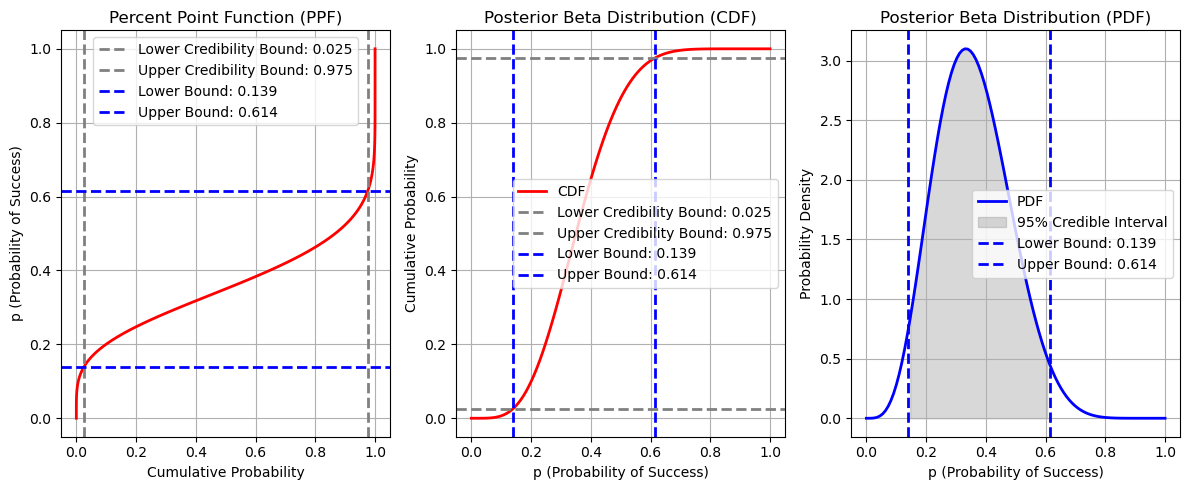

In [22]:
#This is an example of how we might construct a 95% credible interval.
    #We simply find the corresponding y-values (parameters) to the 2.5% and 97.5% cumulative probability x-values on the PPF
    #This will give us boundaries that we can interpret as follows:
        #We are 95% certain that the true underlying probability of success, given our prior and observed data, lies between the x-values derived from the PPF (observe the printed statement for filled in x-values).


lower_cred_bound = 0.025
upper_cred_bound = 0.975
cred_pct = upper_cred_bound-lower_cred_bound

lower_bound = beta.ppf(lower_cred_bound, alpha_updated, beta_updated)
upper_bound = beta.ppf(upper_cred_bound, alpha_updated, beta_updated)
print(f"{100*round(cred_pct, 2)}% credible interval: [{round(lower_bound,3)}, {round(upper_bound,3)}]")
print(f"We can be {100*round(cred_pct, 2)}% certain that the true underlying probability of success, given our prior and observed data, lies between these probabilities [{round(lower_bound,3)}, {round(upper_bound,3)}]")


fig, axes = plt.subplots(1, 3, figsize=(12, 5))

#Plot PPF on left subplot
axes[0].plot(cdf_values, p_hat_cont, color='red', lw=2)
#Draw horizontal dashed lines at the credible interval bounds and display intersecting x values 
axes[0].axvline(lower_cred_bound, color='grey', linestyle='--', lw=2, label=f'Lower Credibility Bound: {lower_cred_bound:.3f}')
axes[0].axvline(upper_cred_bound, color='grey', linestyle='--', lw=2, label=f'Upper Credibility Bound: {upper_cred_bound:.3f}')
axes[0].axhline(lower_bound, color='blue', linestyle='--', lw=2, label=f'Lower Bound: {lower_bound:.3f}')
axes[0].axhline(upper_bound, color='blue', linestyle='--', lw=2, label=f'Upper Bound: {upper_bound:.3f}')
axes[0].set_xlabel("Cumulative Probability")
axes[0].set_ylabel("p (Probability of Success)")
axes[0].set_title("Percent Point Function (PPF)")
axes[0].grid(True)
axes[0].legend()


#Plot CDF on middle subplot
axes[1].plot(p_hat_cont, cdf_values, color='red', lw=2, label="CDF")
#Draw vertical dashed lines at the credible interval bounds and display intersecting x values 
axes[1].axhline(lower_cred_bound, color='grey', linestyle='--', lw=2, label=f'Lower Credibility Bound: {lower_cred_bound:.3f}')
axes[1].axhline(upper_cred_bound, color='grey', linestyle='--', lw=2, label=f'Upper Credibility Bound: {upper_cred_bound:.3f}')
axes[1].axvline(lower_bound, color='blue', linestyle='--', lw=2, label=f'Lower Bound: {lower_bound:.3f}')
axes[1].axvline(upper_bound, color='blue', linestyle='--', lw=2, label=f'Upper Bound: {upper_bound:.3f}')
axes[1].set_xlabel("p (Probability of Success)")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Posterior Beta Distribution (CDF)")
axes[1].grid(True)
axes[1].legend()

#Plot PDF on right subplot
axes[2].plot(p_hat_cont, beta_dist_posterior, color='blue', lw=2, label="PDF")
#Shade area in credible interval
axes[2].fill_between(p_hat_cont, beta_dist_posterior, 
                    where=(p_hat_cont >= lower_bound) & (p_hat_cont <= upper_bound),
                    color='grey', alpha=0.3, label="95% Credible Interval")
#Plot corresponding lower and upper bounds that encapsulate the 95% credible interval                     
axes[2].axvline(lower_bound, color='blue', linestyle='--', lw=2, label=f'Lower Bound: {lower_bound:.3f}')
axes[2].axvline(upper_bound, color='blue', linestyle='--', lw=2, label=f'Upper Bound: {upper_bound:.3f}')                
axes[2].set_xlabel("p (Probability of Success)")
axes[2].set_ylabel("Probability Density")
axes[2].set_title("Posterior Beta Distribution (PDF)")
axes[2].grid(True)
axes[2].legend()


plt.tight_layout()
plt.show()